In [39]:
import numpy as np
import scipy.optimize as opt
import scipy.stats as st
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd

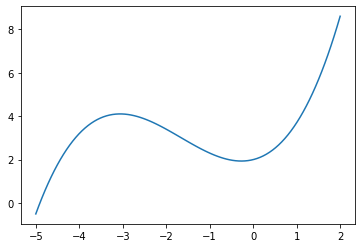

In [40]:
f=np.polynomial.Polynomial([2,.5,1,.2])
n = np.linspace(-5,2,100)
plt.plot(n,f(n))

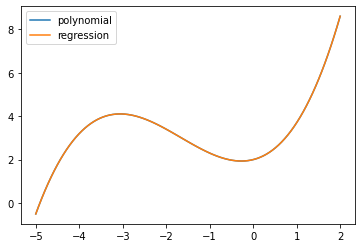

In [41]:
# Polynomial Regression Method
r = np.polyfit(n,f(n),3)
p = np.poly1d(r)
plt.plot(n,f(n),label="polynomial")
plt.plot(n,p(n),label="regression")
plt.legend()
plt.show()


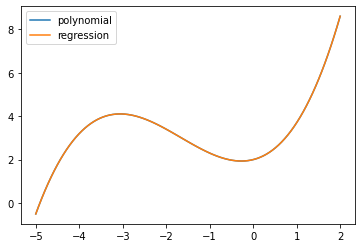

In [45]:
# Ridge Regression Method
model = make_pipeline(PolynomialFeatures(3), LinearRegression())
x_train = n.reshape(-1,1)
y_train = np.reshape(f(n),(-1,1))
model.fit(x_train,y_train)
y_plot=model.predict(x_train)
plt.plot(n,f(n),label="polynomial")
plt.plot(x_train,y_plot,label='regression')

plt.legend()
plt.show()


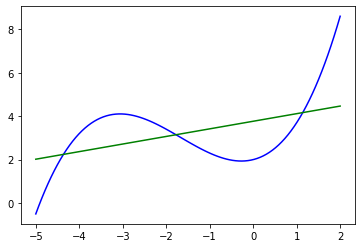

In [43]:
# Linear Regression
linfit=st.linregress(n,f(n))
ypred = [ linfit.slope*xv+linfit.intercept for xv in n]
plt.plot(n,f(n),'b-')
plt.plot(n,ypred,'g-')
plt.show()

## damped sine wave

$$ \left(\frac{a}{b+x}\right)\sin\left(\left(\frac{2\pi}{c}\right)x\right)+d $$

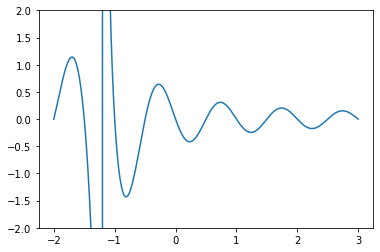

In [46]:
a=0.6
b=1.2
c=-1
d=0
x = np.linspace(-2,3,10000)
f = lambda x: a/(b+x)*np.sin((2*np.pi/c)*x)+d
plt.ylim(-2,2)
plt.plot(x,f(x))

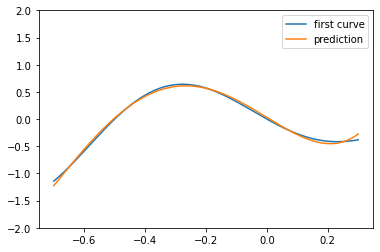

In [47]:
## first curve fit
#Extract training values for first curve
x_train = x[x>=-.7]
x_train = x_train[x_train<=.3]
y_train = f(x_train)
plt.ylim(-2,2)
plt.plot(x_train,y_train,label="first curve")
r = np.polyfit(x_train,y_train,4)
p = np.poly1d(r)
plt.plot(x_train,p(x_train),label="prediction")
plt.legend()
plt.show()


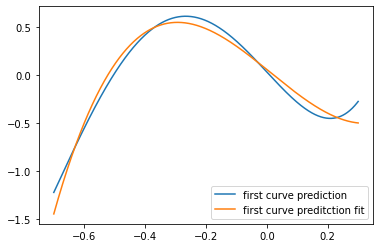

In [48]:
## Fitting predicted curve
r2 = np.polyfit(x_train,p(x_train),3)
p2 = np.poly1d(r2)
plt.plot(x_train,p(x_train),label="first curve prediction")
plt.plot(x_train,p2(x_train),label="first curve preditction fit")
plt.legend()



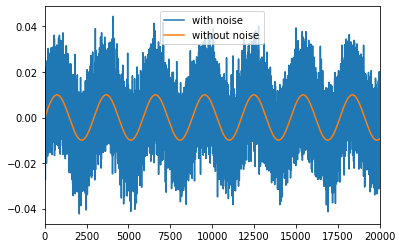

In [49]:
wav = pd.read_csv("/Users/ericreyes/Documents/github/ee104/lab4/sample_Output_mono.csv").to_numpy()
points=int(20e3)
wav_x:np.array =wav[:,0][0:points]
wav_y:np.array = wav[:,1][0:points]
wav_y = wav_y/np.linalg.norm(wav_y)
## generate noise
noisy_y= wav_y+np.random.normal(0, .005, len(wav_y))*2
plt.plot(wav_x,noisy_y,label="with noise")
plt.plot(wav_x,wav_y,label="without noise")
# plot(wav_x,wav_y)
plt.xlim(0,20e3)
plt.legend()
plt.show()

In [ ]:
## curve fitting polynomial with noise
plt.plot(wav_x,noisy_y,label="with noise")
## polyfit
# r = np.polyfit(wav_x,noisy_y,20)
# fit = np.poly1d(r)
# plt.plot(wav_x,fit(wav_x))
# plt.show()
## ridgefit
model = make_pipeline(PolynomialFeatures(12), Ridge())
x_train = wav_x.reshape(-1,1)
y_train = wav_y.reshape(-1,1)
model.fit(x_train,y_train)
y_plot=model.predict(x_train)
plt.plot(x_train,y_plot)
plt.show()

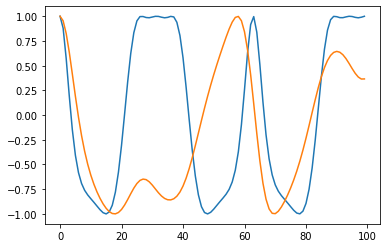

In [50]:
## multivariate variable regression

x0 = [x/10 for x in range(100)]
x1 = [np.sin(x/10) for x in range(100)]
tupx=(x0,x1)
rf = lambda tupx,fx0,fx1: np.cos(np.multiply(tupx[0],fx0)+np.sin(np.multiply(tupx[1],fx1)))
y = rf(tupx,2,3)
plt.plot(y)
popt,pcov=opt.curve_fit(rf,tupx,y) # no guess
plt.plot(rf(tupx,*popt))

With no guess the curve fit is unable to correctly guess the function paramaters, but seems too be relatively close

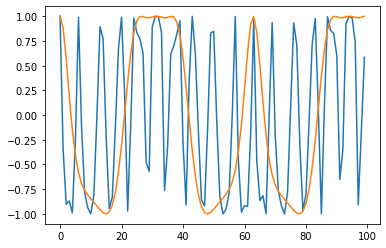

In [51]:
popt,pcov=opt.curve_fit(rf,tupx,y,(10,10)) # too large guess
plt.plot(rf(tupx,*popt))
plt.plot(y)

Too large of a guess causes the curve fit to use values that are too large

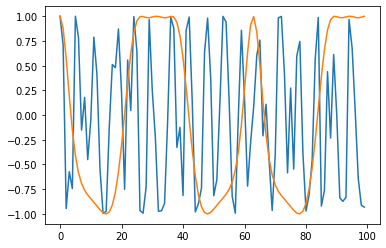

In [52]:
popt,pcov=opt.curve_fit(rf,tupx,y,(0,0)) # guessing 0
plt.plot(rf(tupx,*popt))
plt.plot(y)


Interestingly, guessing (0,0) yields the same result as too large of a guess

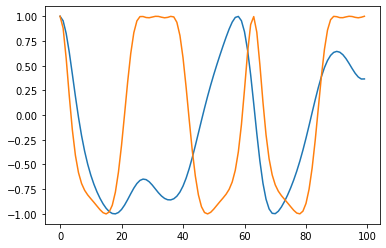

In [53]:
popt,pcov=opt.curve_fit(rf,tupx,y,(1,1)) # small guess
plt.plot(rf(tupx,*popt))
plt.plot(y)

too small of a guess yields the same result as no guess

In [ ]:
popt,pcov=opt.curve_fit(rf,tupx,y,(2,2)) # small guess
plt.plot(rf(tupx,*popt))
plt.plot(y)

A guess close enough to the correct parameters allows the curve fit to find guess correctly